In [1]:
import pandas as pd

df = pd.read_csv('Data/hourly_data_ff.csv')
Time = df['timestamp']
df.drop(columns=['timestamp'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 2000/2000 [00:03<00:00, 506.60it/s, loss=-283.439758]


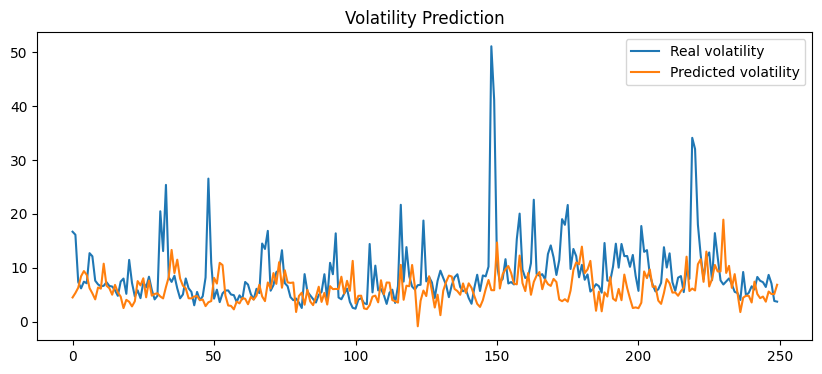

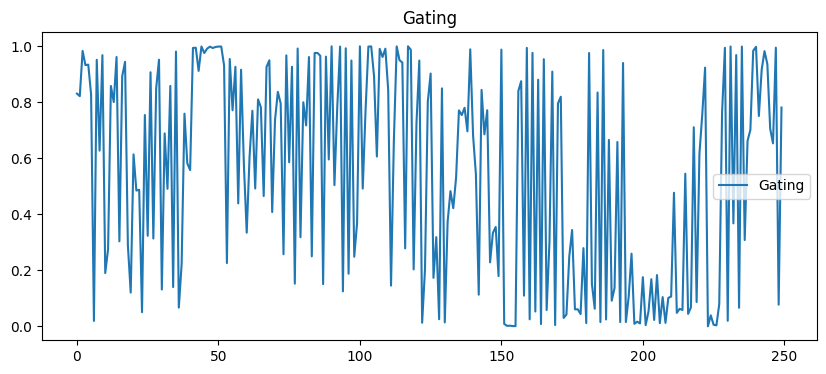

Test RMSE: 6.7128


In [ ]:
from Models.TM_G import TM_G
from Model_eval.TM_eval import evaluate_TM
from sklearn.preprocessing import StandardScaler
import numpy as np
dfs = np.array_split(df,10)

df_train = pd.concat([dfs[j] for j in range(3)], axis=0, ignore_index=True).reset_index(drop = True)
df_test = dfs[3]

feature_cols = ['spread', 'bid_depth', 'ask_depth', 'bid_volume', 'volume_difference']
model = TM_G(n_features = len(feature_cols), lv = 5, lb = 10, lambda_reg = 0.1, alpha = 1, lambda_entropy = 1e3)
scaler = StandardScaler()
df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols]) + 5
useful_cols = ['vol'] + feature_cols
model.train_model(df_train[useful_cols], epochs = 2000)
df_test[feature_cols] = scaler.transform(df_test[feature_cols]) + 5
rmse, _, _, _ = evaluate_TM(model, df_test[useful_cols])
print(f'Test RMSE: {rmse:.4f}')

